# Chemical-Image2SMILES
#### Method
: Image => Skeleton => Graph => Mol => SMILES

In [7]:
import PIL.Image as pilimg
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import morphology
from skan import draw
from skan.csr import skeleton_to_csgraph
from rdkit import Chem

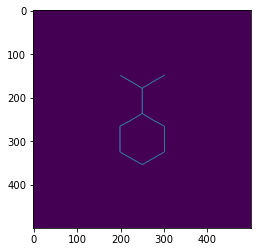

In [2]:
img = pilimg.open('Isopropylcyclohexane_500.png')

pix = np.array(img)
pix = np.where(pix>np.mean(pix),1.0,0.0)
# pix = rgb2gray(pix)

skeleton = morphology.skeletonize(pix)

plt.imshow(skeleton)
plt.show()

# Problems
Skeleton => Graph
- not easy to make nodes to vertices from skeleton
- not easy to know what symbols of atoms from nodes are

#### Therefore, I just only suggest an idea with a simple example.

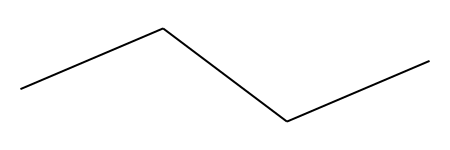

In [3]:
Chem.MolFromSmiles('CCCC')

In [4]:
pix = np.array([[False, False, False, False, False, False], 
                [False, False, True, False, True, False], 
                [False, True, False, True, False, False], 
                [False, False, False, False, False, False]])

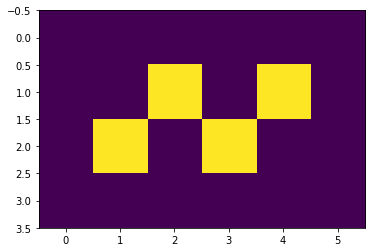

In [5]:
plt.imshow(pix)
plt.show()

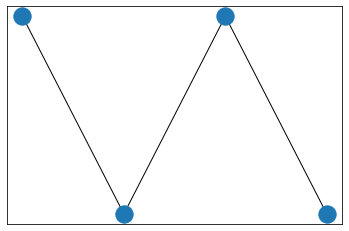

In [8]:
pixel_graph, coordinates, degrees = skeleton_to_csgraph(pix)

draw.overlay_skeleton_networkx(pixel_graph, coordinates, with_labels=False)
plt.show()

In [9]:
# Edge List
coordinates = coordinates[1:]
coordinates = coordinates - 1
coordinates

array([[0., 1.],
       [0., 3.],
       [1., 0.],
       [1., 2.]])

In [10]:
# Adjacency

size = len(set([n for e in coordinates for n in e])) 
adjacency = [[0]*size for _ in range(size)]
for sink, source in coordinates:
    adjacency[int(sink)][int(source)] = 1
    adjacency[int(source)][int(sink)] = 1

adjacency = np.array(adjacency) + np.eye(size)
adjacency

array([[1., 1., 0., 1.],
       [1., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.]])

In [11]:
def MolFromGraphs(node_list, adjacency_matrix):

    # create empty editable mol object
    mol = Chem.RWMol()

    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i in range(len(node_list)):
        a = Chem.Atom(node_list[i])
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    for ix, row in enumerate(adjacency_matrix):
        for iy, bond in enumerate(row):

            # only traverse half the matrix
            if iy <= ix:
                continue

            # add relevant bond type (there are many more of these)
            if bond == 0:
                continue
            elif bond == 1:
                bond_type = Chem.rdchem.BondType.SINGLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
            elif bond == 2:
                bond_type = Chem.rdchem.BondType.DOUBLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)

    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol

In [12]:
Chem.MolToSmiles(MolFromGraphs(['C' for i in range(size)], adjacency))

'CCCC'

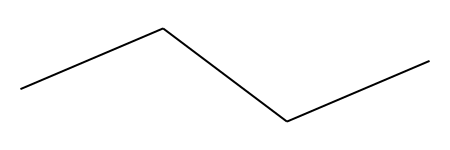

In [13]:
MolFromGraphs(['C' for i in range(size)], adjacency)